In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc

import keras as k
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.layers import Input
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
from heamy.dataset import Dataset

from IPython.display import Image
import matplotlib.pyplot as plt
from IPython.display import display

from vis.utils import utils
from vis.visualization import visualize_saliency
from vis.visualization import visualize_cam


from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, precision_score 
from skimage import io,transform

import time

import os
import fnmatch

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('train_v2.csv')

labels = ['blow_down',
 'bare_ground',
 'conventional_mine',
 'blooming',
 'artisinal_mine',
 'selective_logging',         
 'slash_burn', 
 'cultivation',
 'habitation',
 'road',
 'agriculture',
 'water',
 'primary',
 'partly_cloudy', 
 'cloudy',
 'clear',
 'haze',]

label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}

In [3]:
from keras.models import load_model
model = load_model('inc_model')

In [4]:
model.load_weights('inc_weights_2')
train_mean = np.load('inc_train_mean.npy')
thresh_2_val = np.load('thresh_2_val.npy')

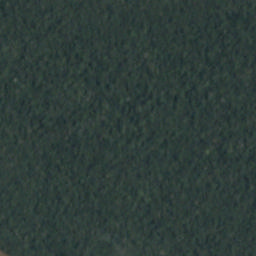

True label
clear primary
Predicted
['primary clear']


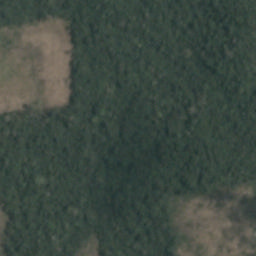

True label
agriculture clear cultivation primary
Predicted
['cultivation agriculture primary clear']


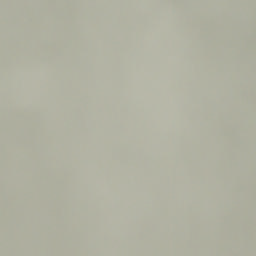

True label
cloudy
Predicted
['cloudy']


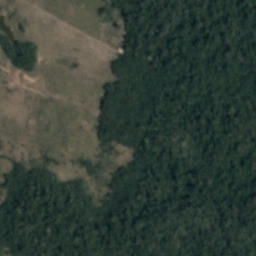

True label
agriculture clear habitation primary road
Predicted
['habitation road agriculture primary clear']


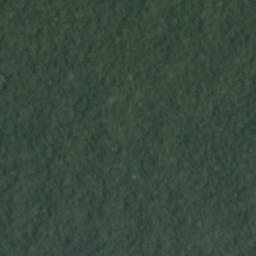

True label
clear primary
Predicted
['primary clear']


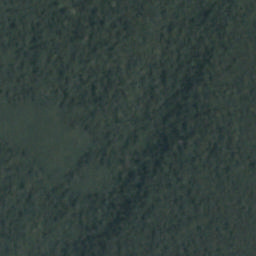

True label
clear primary
Predicted
['primary clear']


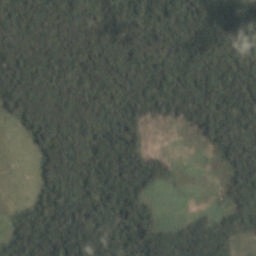

True label
agriculture clear cultivation primary
Predicted
['cultivation agriculture primary clear']


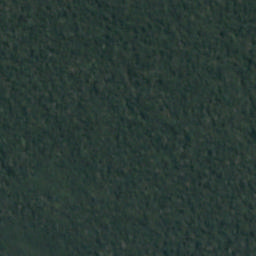

True label
clear primary
Predicted
['primary clear']


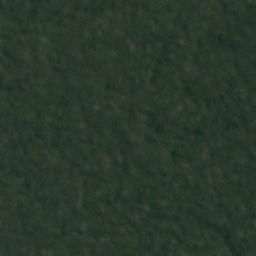

True label
clear primary
Predicted
['primary clear']


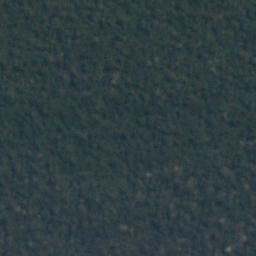

True label
clear primary
Predicted
['primary clear']


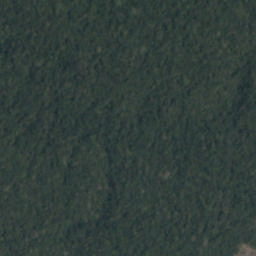

True label
clear primary
Predicted
['primary clear']


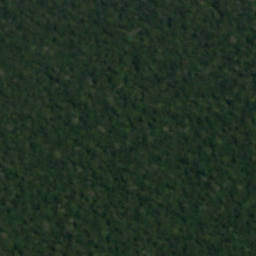

True label
clear primary
Predicted
['primary clear']


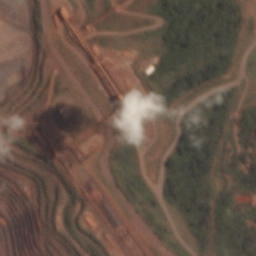

True label
conventional_mine habitation partly_cloudy primary road
Predicted
['conventional_mine habitation road primary partly_cloudy']


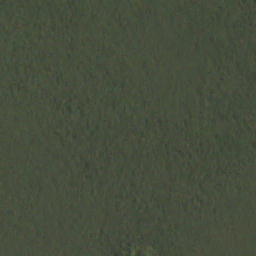

True label
clear primary
Predicted
['primary clear']


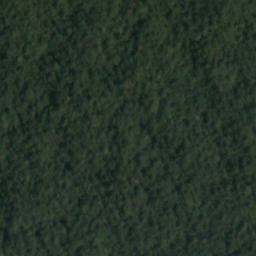

True label
clear primary
Predicted
['primary clear']


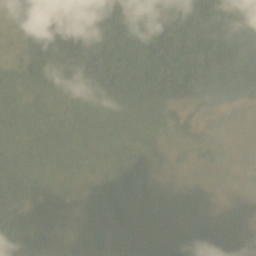

True label
agriculture partly_cloudy primary
Predicted
['agriculture primary partly_cloudy']


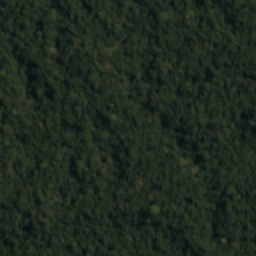

True label
clear primary
Predicted
['primary clear']


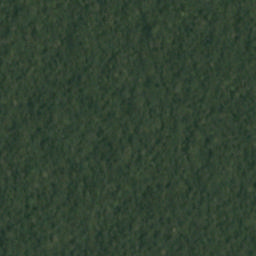

True label
clear primary
Predicted
['primary clear']


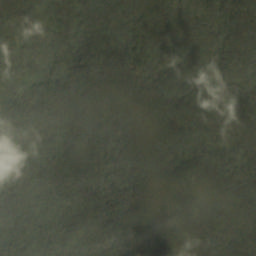

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


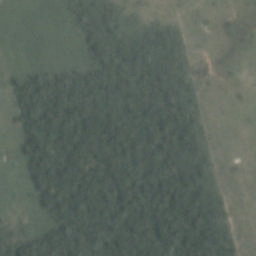

True label
agriculture clear primary road
Predicted
['road agriculture primary clear']


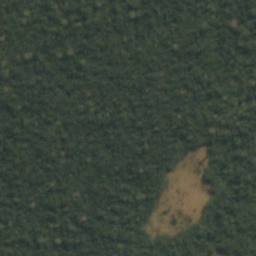

True label
agriculture clear cultivation primary
Predicted
['cultivation agriculture primary clear']


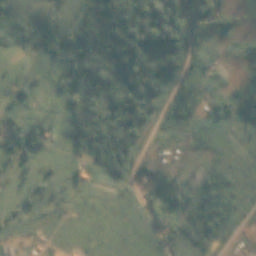

True label
agriculture clear habitation primary road
Predicted
['habitation road agriculture primary clear']


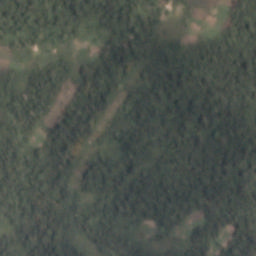

True label
agriculture clear cultivation habitation primary
Predicted
['cultivation habitation agriculture primary clear']


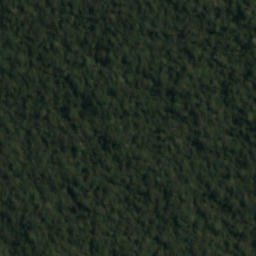

True label
clear primary
Predicted
['primary clear']


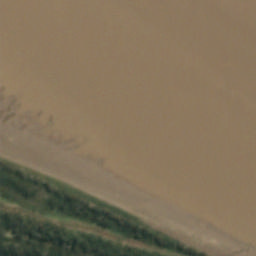

True label
clear primary water
Predicted
['water primary clear']


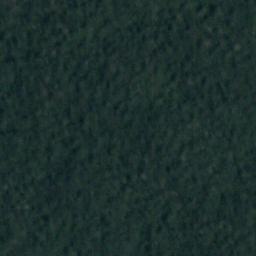

True label
clear primary
Predicted
['primary clear']


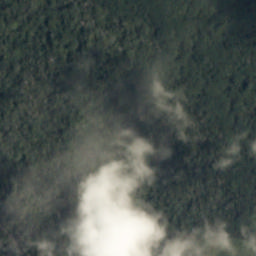

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


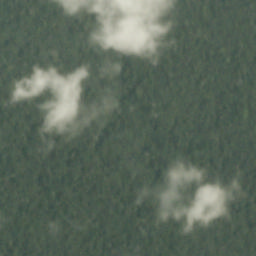

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


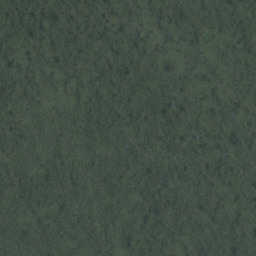

True label
clear primary
Predicted
['primary clear']


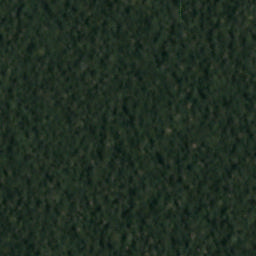

True label
clear primary
Predicted
['primary clear']


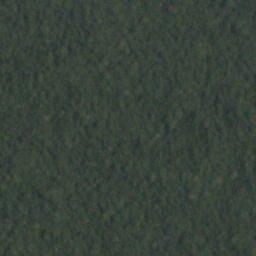

True label
clear primary
Predicted
['primary clear']


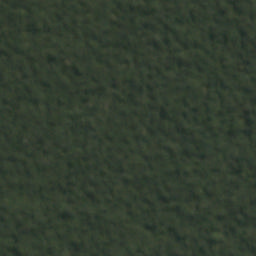

True label
clear primary
Predicted
['primary clear']


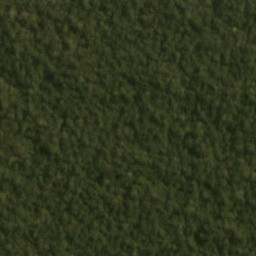

True label
clear primary
Predicted
['primary clear']


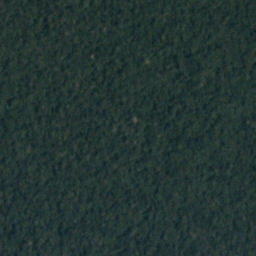

True label
clear primary
Predicted
['primary clear']


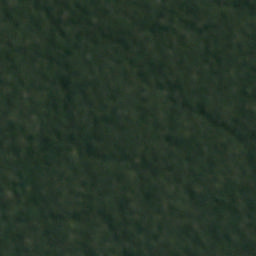

True label
clear primary
Predicted
['primary clear']


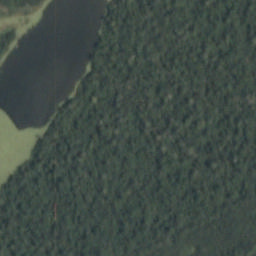

True label
clear primary water
Predicted
['water primary clear']


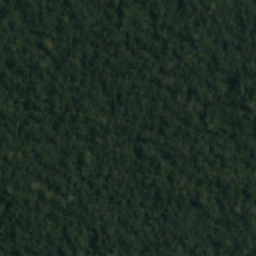

True label
clear primary
Predicted
['primary clear']


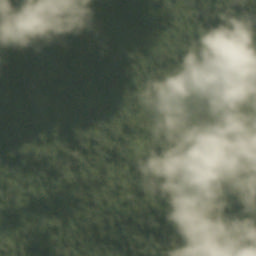

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


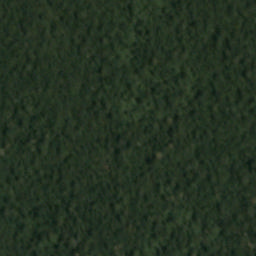

True label
clear primary
Predicted
['primary clear']


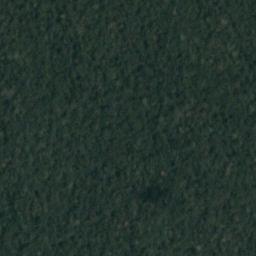

True label
clear primary
Predicted
['primary clear']


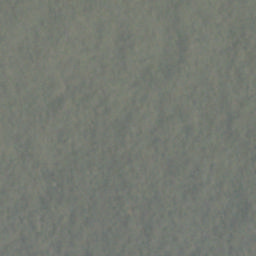

True label
haze primary
Predicted
['primary haze']


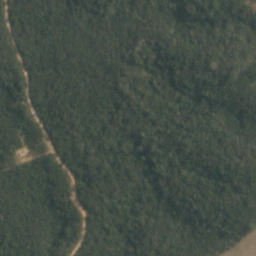

True label
clear primary road water
Predicted
['road water primary clear']


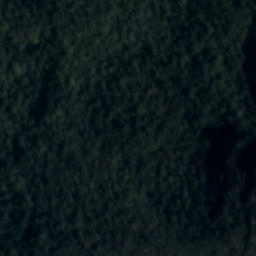

True label
clear primary
Predicted
['primary clear']


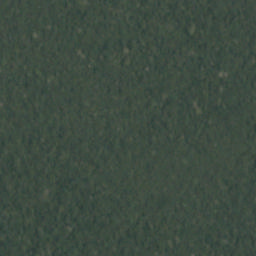

True label
clear primary
Predicted
['primary clear']


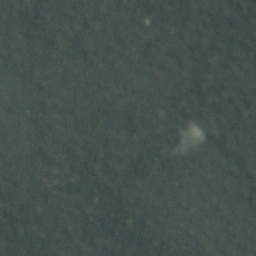

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


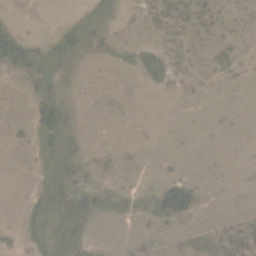

True label
agriculture clear primary road
Predicted
['road agriculture primary clear']


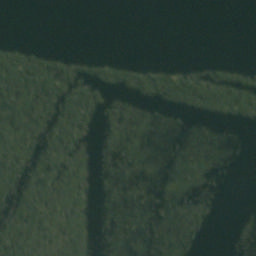

True label
clear primary water
Predicted
['water primary clear']


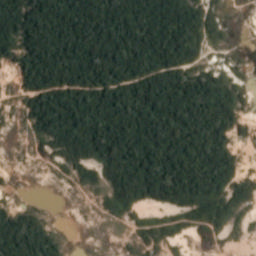

True label
artisinal_mine clear habitation primary road water
Predicted
['artisinal_mine habitation road water primary clear']


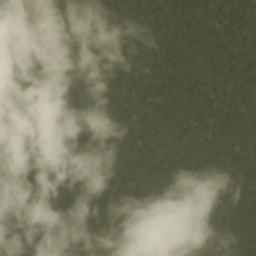

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


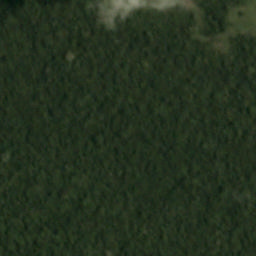

True label
agriculture cultivation partly_cloudy primary
Predicted
['cultivation agriculture primary partly_cloudy']


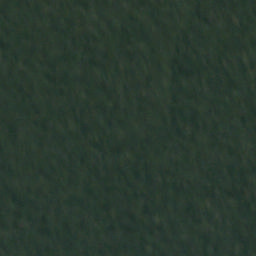

True label
clear primary
Predicted
['primary clear']


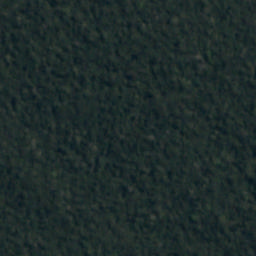

True label
clear primary
Predicted
['primary clear']


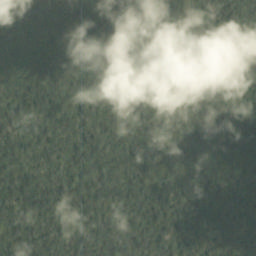

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


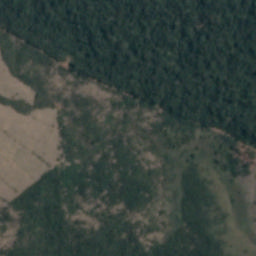

True label
agriculture clear primary
Predicted
['agriculture primary clear']


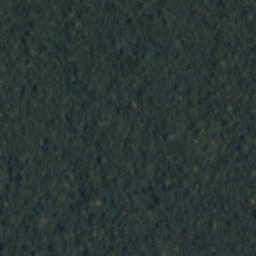

True label
clear primary
Predicted
['primary clear']


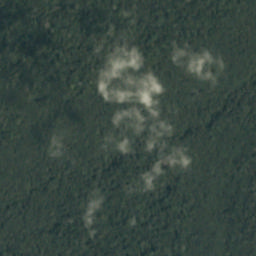

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


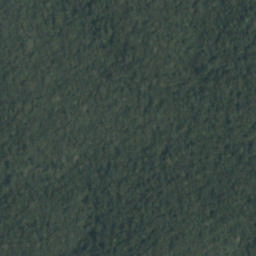

True label
clear primary
Predicted
['primary clear']


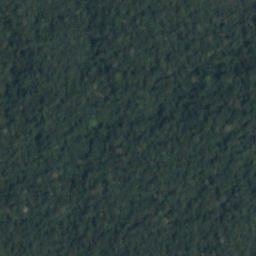

True label
clear primary
Predicted
['primary clear']


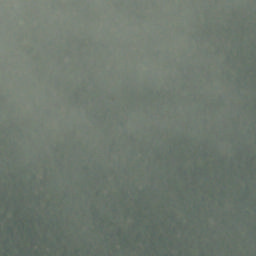

True label
haze primary
Predicted
['primary haze']


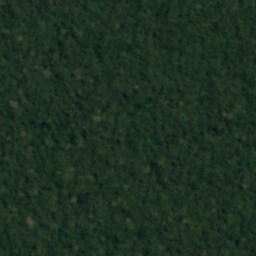

True label
clear primary
Predicted
['primary clear']


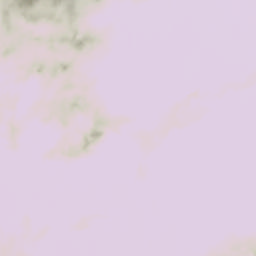

True label
cloudy
Predicted
['cloudy']


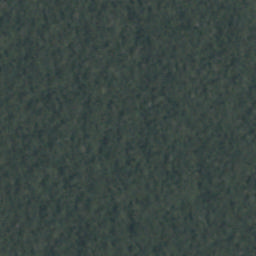

True label
clear primary
Predicted
['primary clear']


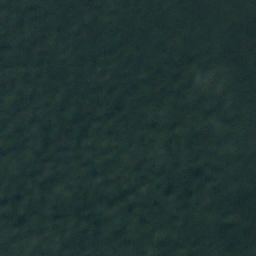

True label
clear primary
Predicted
['primary clear']


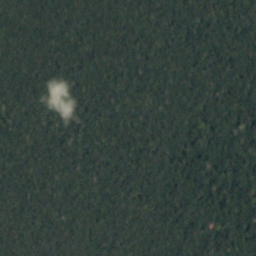

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


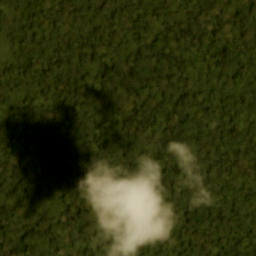

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


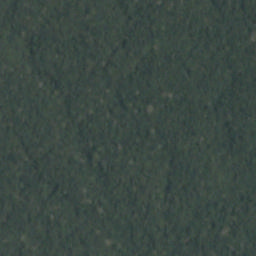

True label
clear primary
Predicted
['primary clear']


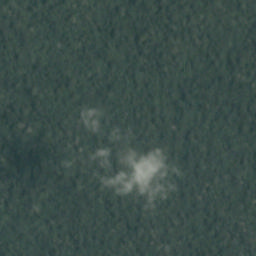

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


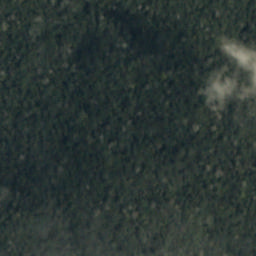

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


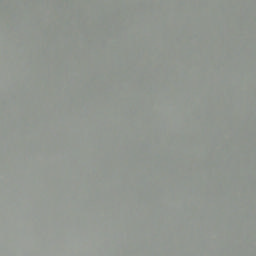

True label
cloudy
Predicted
['cloudy']


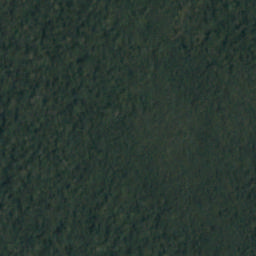

True label
clear primary
Predicted
['primary clear']


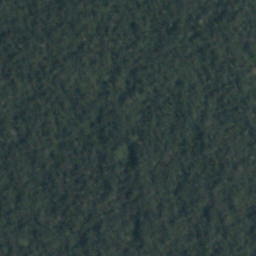

True label
clear primary
Predicted
['primary clear']


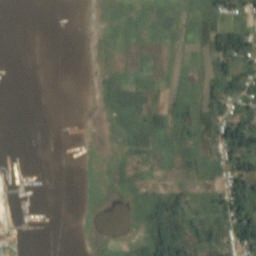

True label
agriculture clear habitation primary road water
Predicted
['habitation road agriculture water primary clear']


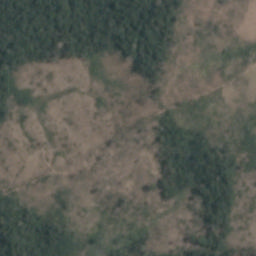

True label
agriculture clear cultivation primary
Predicted
['cultivation agriculture primary clear']


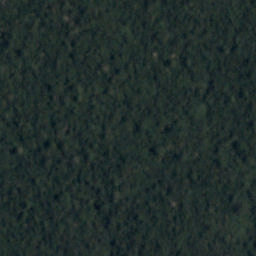

True label
clear primary
Predicted
['primary clear']


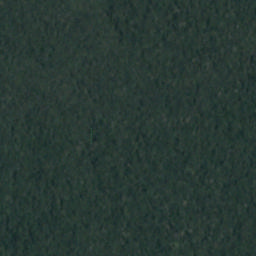

True label
clear primary
Predicted
['primary clear']


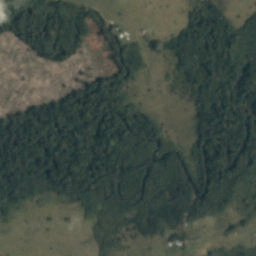

True label
agriculture clear cultivation habitation primary
Predicted
['cultivation habitation agriculture primary clear']


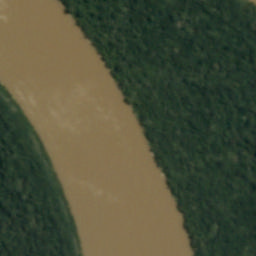

True label
clear primary water
Predicted
['water primary clear']


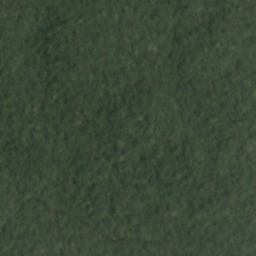

True label
clear primary
Predicted
['primary clear']


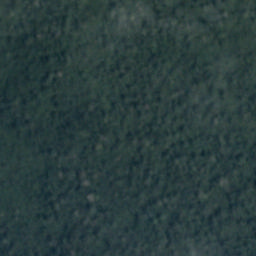

True label
clear primary
Predicted
['primary clear']


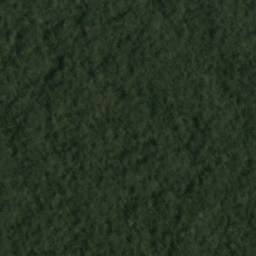

True label
clear primary
Predicted
['primary clear']


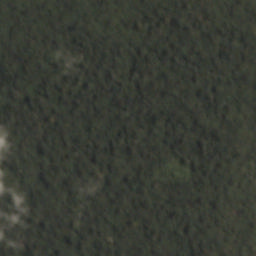

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


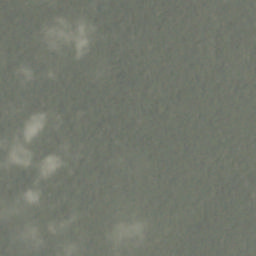

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


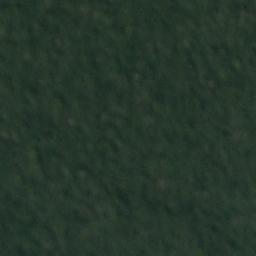

True label
clear primary
Predicted
['primary clear']


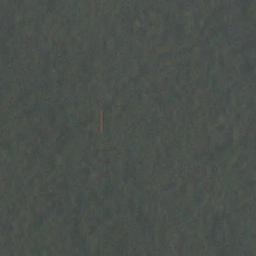

True label
clear primary
Predicted
['primary clear']


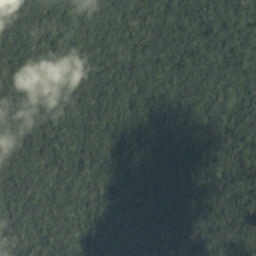

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


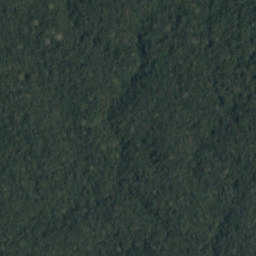

True label
clear primary
Predicted
['primary clear']


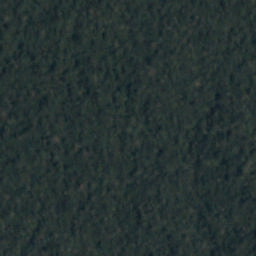

True label
clear primary
Predicted
['primary clear']


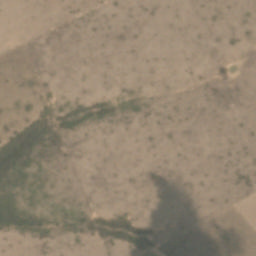

True label
agriculture clear primary road
Predicted
['road agriculture primary clear']


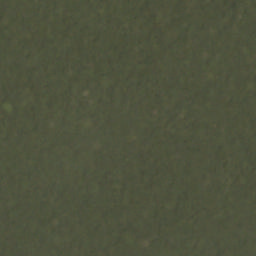

True label
clear primary
Predicted
['primary clear']


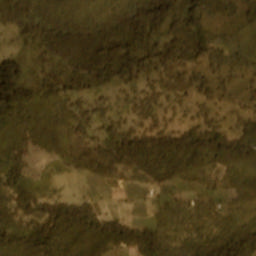

True label
agriculture clear habitation primary
Predicted
['habitation agriculture primary clear']


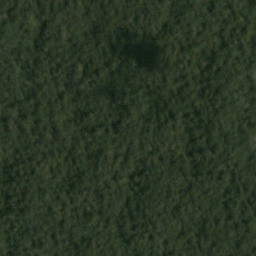

True label
clear primary
Predicted
['primary clear']


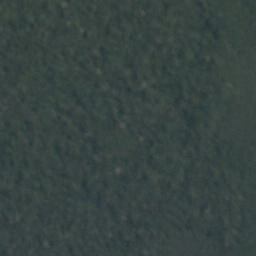

True label
clear primary
Predicted
['primary clear']


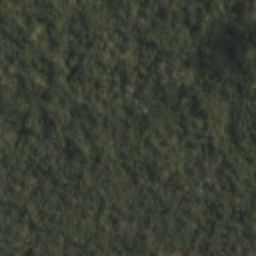

True label
clear primary
Predicted
['primary clear']


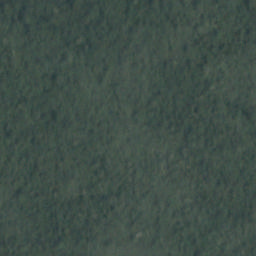

True label
clear primary
Predicted
['primary clear']


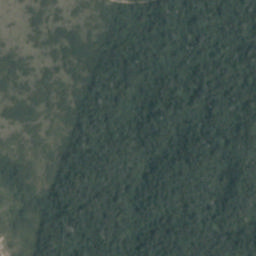

True label
agriculture clear primary
Predicted
['agriculture primary clear']


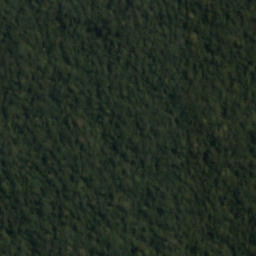

True label
clear primary
Predicted
['primary clear']


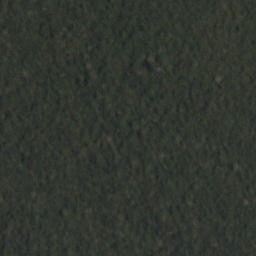

True label
clear primary
Predicted
['primary clear']


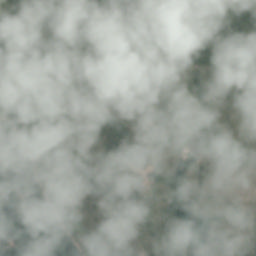

True label
cloudy
Predicted
['cloudy']


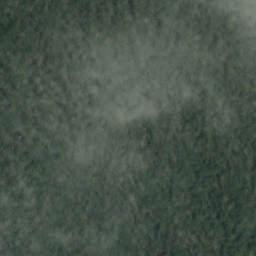

True label
partly_cloudy primary
Predicted
['primary partly_cloudy']


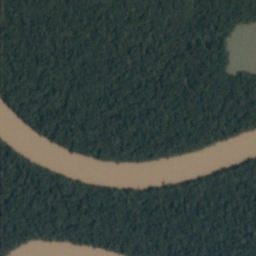

True label
clear primary water
Predicted
['water primary clear']


In [47]:
#Some correctly predicted examples
i = 0
while(i<100):
    idx = np.random.randint(40479)
    f,tags = df_train.values[idx,:]
    img = cv2.imread('train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
    x_train = np.array(cv2.resize(img, (200, 200)),np.float32)/255.#139 minimum size for inception
    x_train -= train_mean
    targets = np.array(targets,bool)
    y = model.predict(x_train[np.newaxis,:])
    y_pred = np.array(y > thresh_2_val,bool)
    if(y_pred==targets).all():
        ipython_img = Image(filename='train-jpg/{}.jpg'.format(f))
        display(ipython_img)
        labels_np = np.array(labels)
        preds = [' '.join(labels_np[np.array(y_pred[i,:],bool)]) for i in range(y_pred.shape[0])]
        print('True label')
        print(tags)
        print('Predicted')
        print(preds)
        i+=1

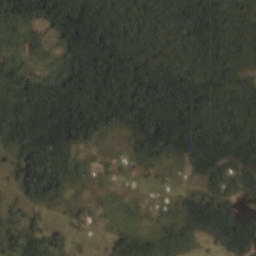

True label
agriculture clear habitation primary
Predicted
['cultivation habitation road agriculture primary clear']


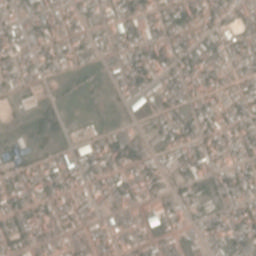

True label
clear habitation road
Predicted
['habitation road primary clear']


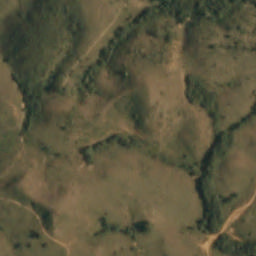

True label
agriculture clear cultivation primary road
Predicted
['road agriculture water primary clear']


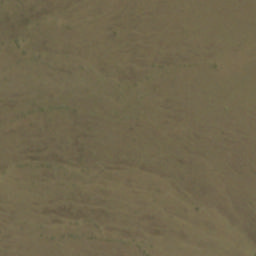

True label
agriculture clear primary road
Predicted
['bare_ground agriculture primary clear']


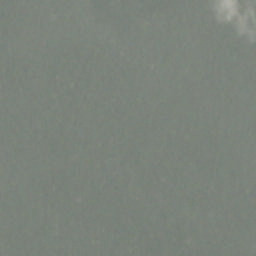

True label
haze primary
Predicted
['primary partly_cloudy cloudy haze']


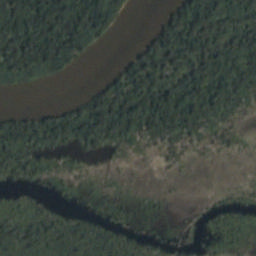

True label
agriculture clear primary water
Predicted
['bare_ground agriculture water primary clear']


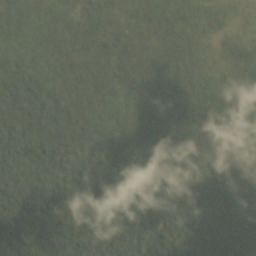

True label
partly_cloudy primary
Predicted
['agriculture primary partly_cloudy']


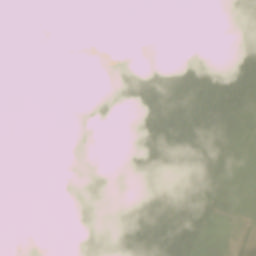

True label
cloudy
Predicted
['primary cloudy']


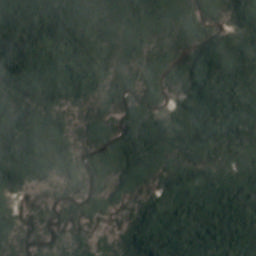

True label
agriculture partly_cloudy primary
Predicted
['habitation road agriculture primary partly_cloudy clear']


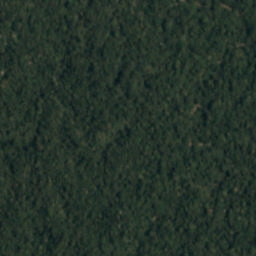

True label
clear primary
Predicted
['selective_logging primary clear']


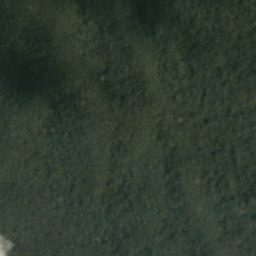

True label
clear primary
Predicted
['primary partly_cloudy']


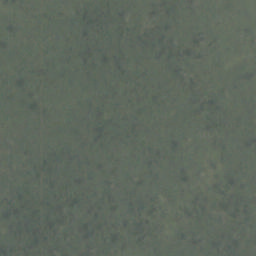

True label
haze primary
Predicted
['primary clear haze']


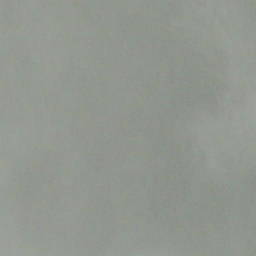

True label
haze primary
Predicted
['cloudy']


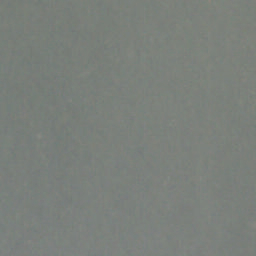

True label
haze primary
Predicted
['primary cloudy haze']


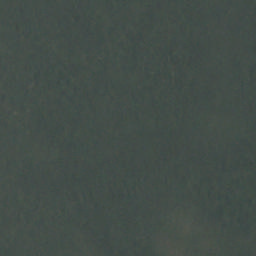

True label
haze primary
Predicted
['primary clear haze']


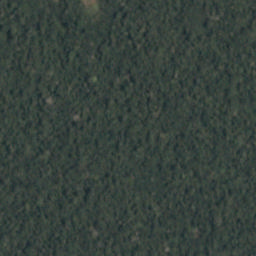

True label
clear primary
Predicted
['cultivation agriculture primary clear']


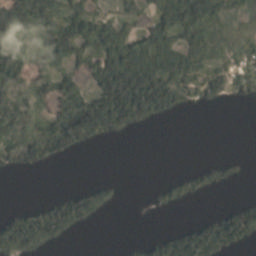

True label
agriculture cultivation partly_cloudy primary water
Predicted
['cultivation habitation agriculture water primary partly_cloudy']


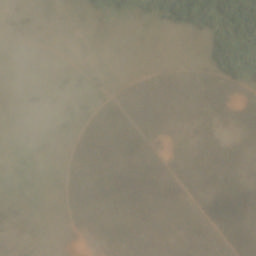

True label
haze primary road water
Predicted
['road agriculture primary haze']


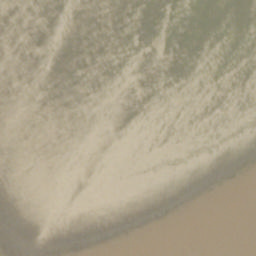

True label
clear primary water
Predicted
['agriculture water primary cloudy clear haze']


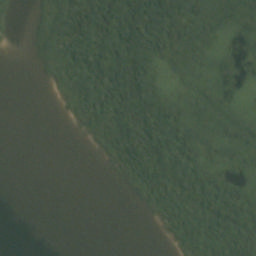

True label
agriculture clear primary water
Predicted
['cultivation agriculture water primary clear']


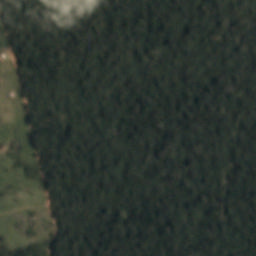

True label
agriculture partly_cloudy primary
Predicted
['cultivation habitation road agriculture water primary partly_cloudy']


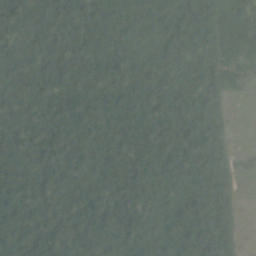

True label
agriculture haze primary
Predicted
['road agriculture primary clear haze']


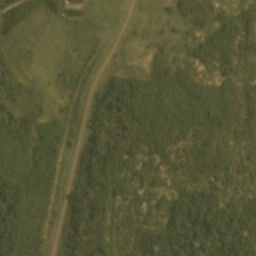

True label
agriculture clear primary road
Predicted
['habitation road agriculture primary clear']


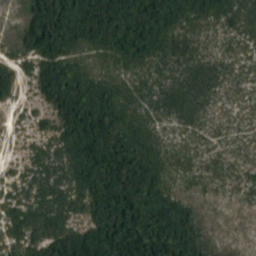

True label
agriculture clear habitation primary road
Predicted
['conventional_mine habitation road agriculture water primary clear']


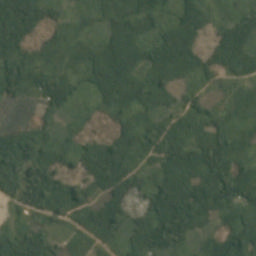

True label
clear cultivation habitation primary road slash_burn
Predicted
['slash_burn cultivation habitation road agriculture primary clear']


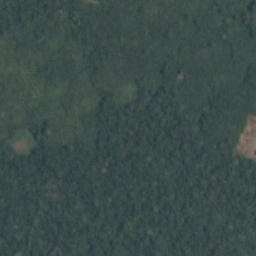

True label
clear cultivation primary
Predicted
['cultivation agriculture primary clear']


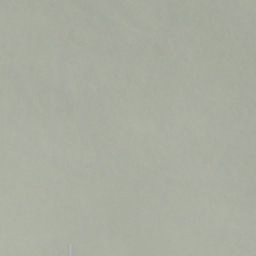

True label
haze primary
Predicted
['cloudy']


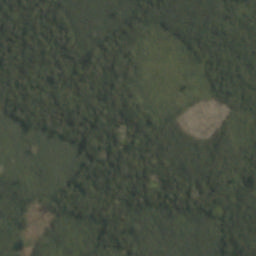

True label
clear cultivation primary
Predicted
['cultivation agriculture primary clear']


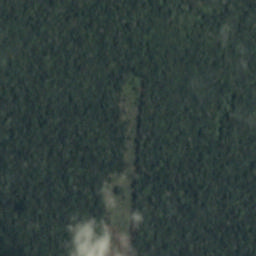

True label
agriculture partly_cloudy primary
Predicted
['cultivation agriculture primary partly_cloudy']


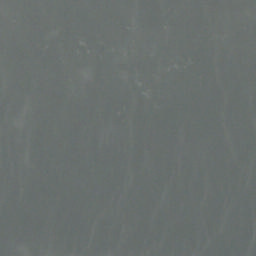

True label
haze primary
Predicted
['primary cloudy haze']


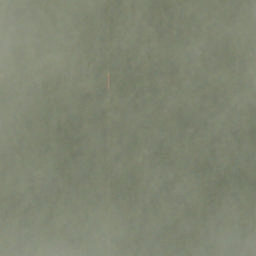

True label
haze primary
Predicted
['primary cloudy haze']


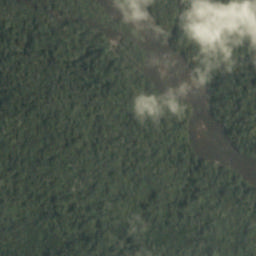

True label
partly_cloudy primary water
Predicted
['agriculture water primary partly_cloudy']


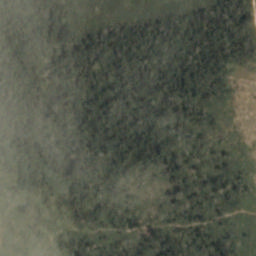

True label
agriculture partly_cloudy primary road
Predicted
['road agriculture water primary partly_cloudy']


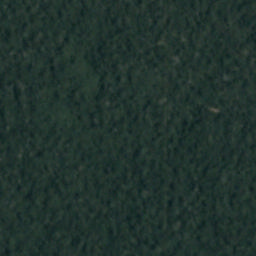

True label
clear primary
Predicted
['agriculture primary clear']


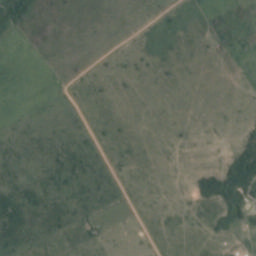

True label
agriculture clear habitation primary road
Predicted
['road agriculture primary clear']


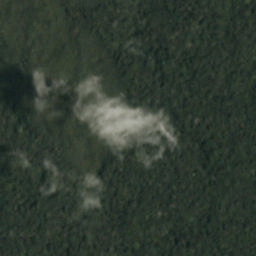

True label
agriculture partly_cloudy primary
Predicted
['primary partly_cloudy']


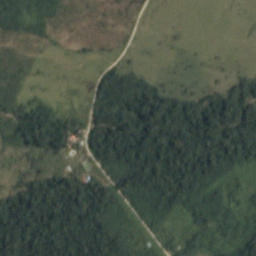

True label
agriculture clear habitation primary road
Predicted
['habitation road agriculture water primary clear']


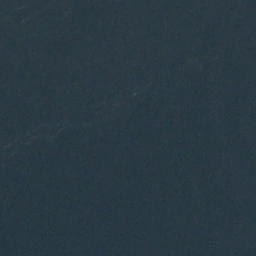

True label
haze primary
Predicted
['primary clear haze']


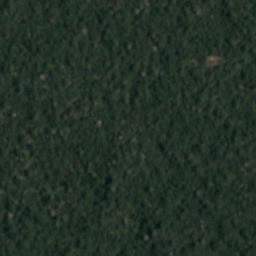

True label
clear primary
Predicted
['selective_logging primary clear']


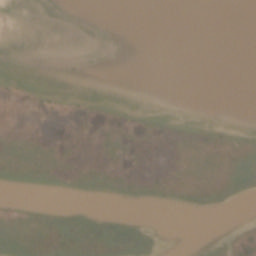

True label
agriculture clear primary water
Predicted
['road agriculture water primary cloudy clear haze']


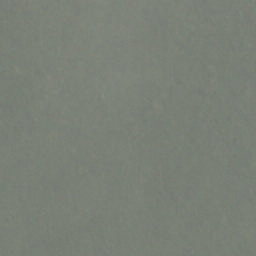

True label
haze primary
Predicted
['primary cloudy haze']


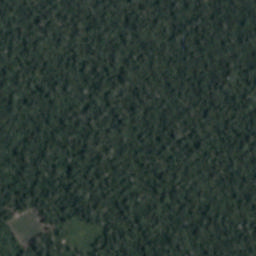

True label
clear cultivation primary
Predicted
['cultivation agriculture primary clear']


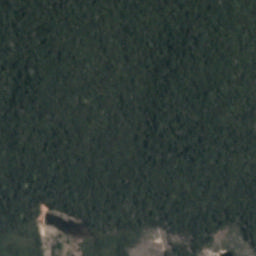

True label
agriculture clear primary
Predicted
['cultivation road agriculture water primary clear']


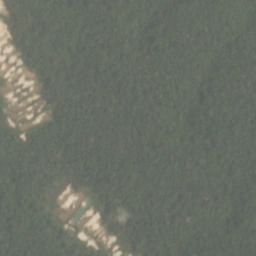

True label
agriculture clear cultivation primary road
Predicted
['cultivation habitation road agriculture primary clear']


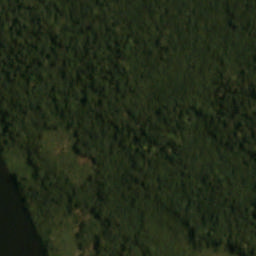

True label
clear primary water
Predicted
['cultivation agriculture water primary clear']


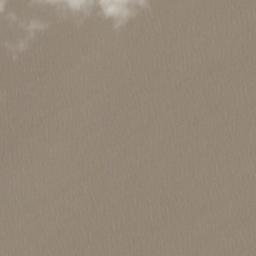

True label
agriculture partly_cloudy primary
Predicted
['agriculture water primary partly_cloudy cloudy']


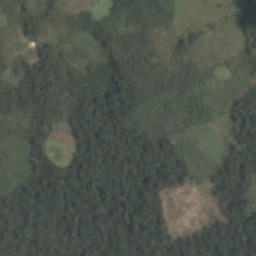

True label
agriculture clear cultivation primary
Predicted
['cultivation habitation agriculture primary clear']


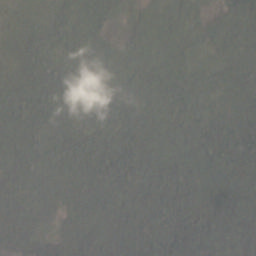

True label
agriculture bare_ground haze primary
Predicted
['cultivation agriculture primary partly_cloudy haze']


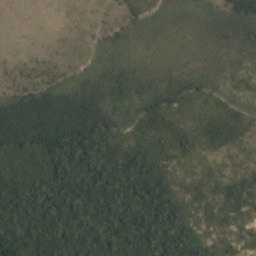

True label
agriculture clear primary road
Predicted
['road agriculture water primary clear']


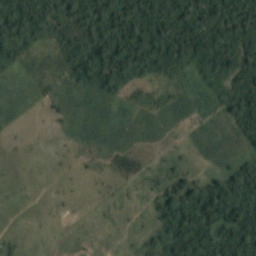

True label
agriculture clear cultivation primary
Predicted
['cultivation road agriculture primary clear']


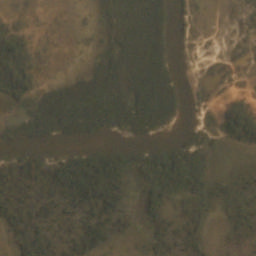

True label
bare_ground clear primary water
Predicted
['habitation road agriculture water primary clear']


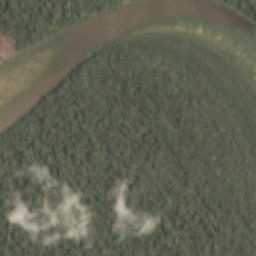

True label
partly_cloudy primary water
Predicted
['agriculture water primary partly_cloudy']


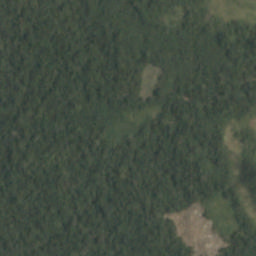

True label
clear cultivation primary
Predicted
['cultivation agriculture primary clear']


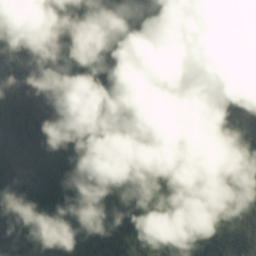

True label
cloudy
Predicted
['primary cloudy']


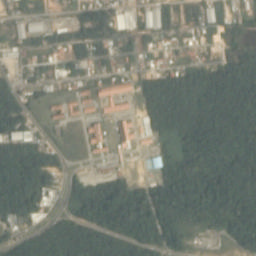

True label
clear habitation primary road
Predicted
['habitation road agriculture water primary clear']


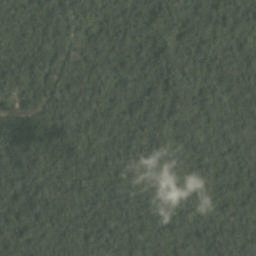

True label
partly_cloudy primary road
Predicted
['primary partly_cloudy']


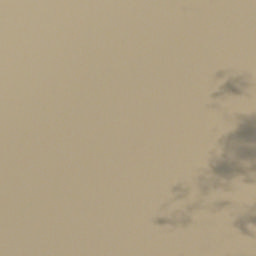

True label
agriculture clear water
Predicted
['water primary cloudy clear']


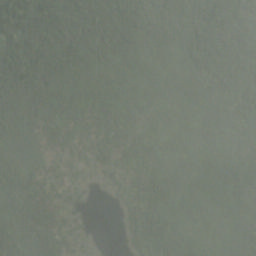

True label
agriculture clear primary water
Predicted
['agriculture water primary haze']


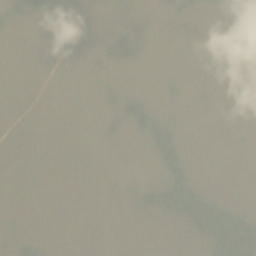

True label
haze primary water
Predicted
['road agriculture water primary partly_cloudy cloudy haze']


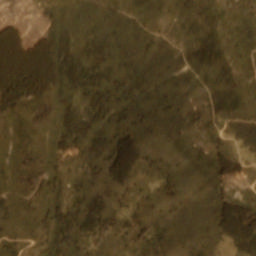

True label
agriculture bare_ground clear habitation road
Predicted
['bare_ground habitation road agriculture primary clear']


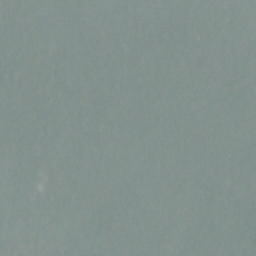

True label
haze primary
Predicted
['primary cloudy haze']


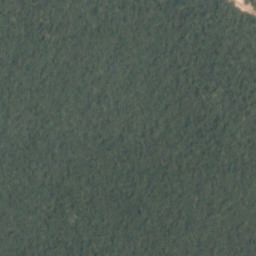

True label
clear primary
Predicted
['agriculture water primary clear']


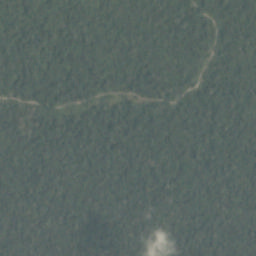

True label
partly_cloudy primary road
Predicted
['road water primary partly_cloudy']


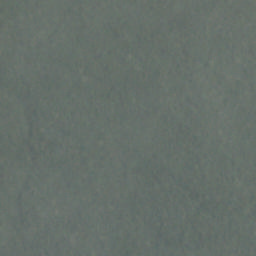

True label
haze primary water
Predicted
['primary haze']


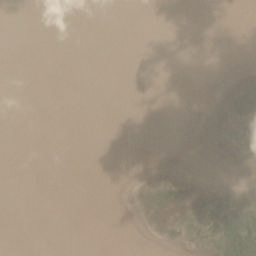

True label
agriculture partly_cloudy primary water
Predicted
['agriculture water primary partly_cloudy haze']


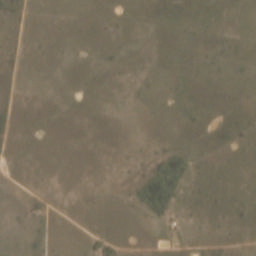

True label
agriculture clear primary road
Predicted
['bare_ground habitation road agriculture primary clear']


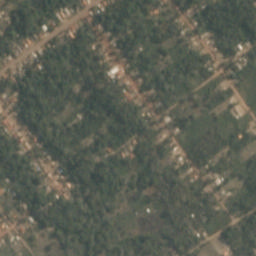

True label
clear habitation primary road
Predicted
['habitation road agriculture primary clear']


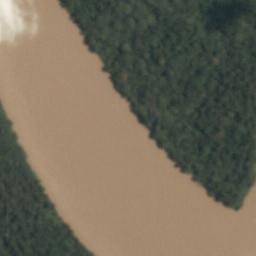

True label
clear primary water
Predicted
['water primary partly_cloudy clear']


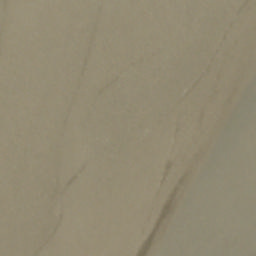

True label
agriculture haze
Predicted
['bare_ground agriculture water primary clear haze']


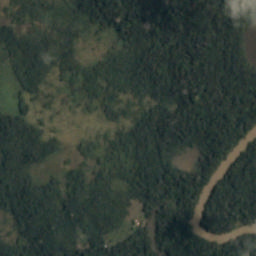

True label
agriculture clear cultivation primary water
Predicted
['cultivation habitation road agriculture water primary clear']


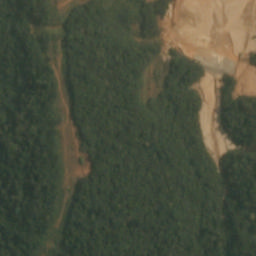

True label
agriculture clear primary road
Predicted
['road agriculture water primary clear']


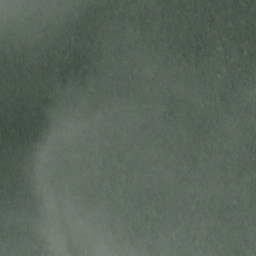

True label
partly_cloudy primary
Predicted
['primary partly_cloudy haze']


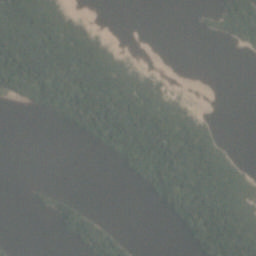

True label
clear primary water
Predicted
['water primary clear haze']


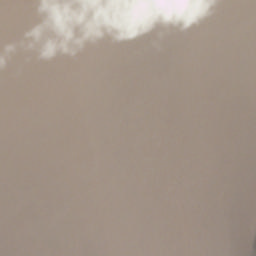

True label
partly_cloudy primary water
Predicted
['water primary partly_cloudy cloudy']


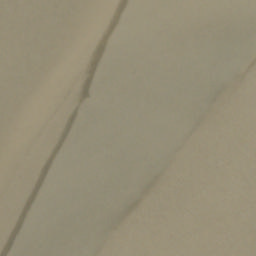

True label
clear water
Predicted
['bare_ground agriculture water primary clear haze']


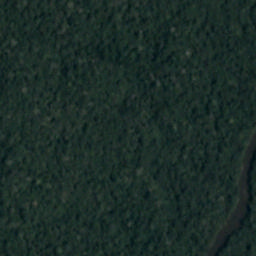

True label
clear primary
Predicted
['water primary clear']


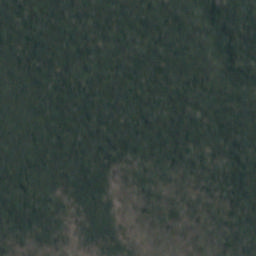

True label
clear primary
Predicted
['cultivation agriculture primary clear']


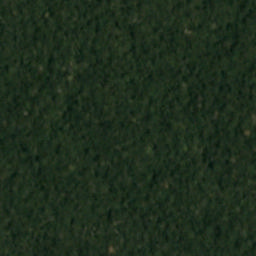

True label
blooming clear primary
Predicted
['primary clear']


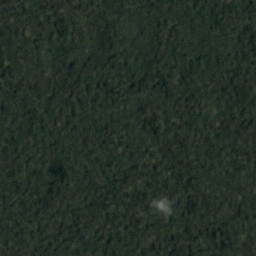

True label
clear primary
Predicted
['primary partly_cloudy clear']


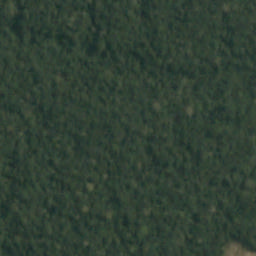

True label
blooming clear primary
Predicted
['primary clear']


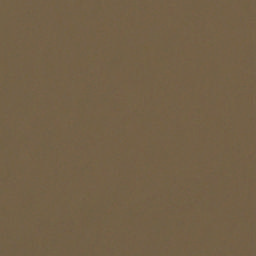

True label
clear water
Predicted
['water primary clear']


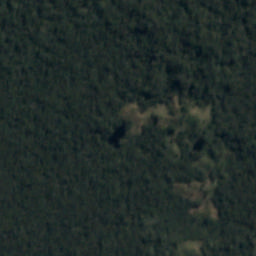

True label
clear primary
Predicted
['cultivation agriculture primary clear']


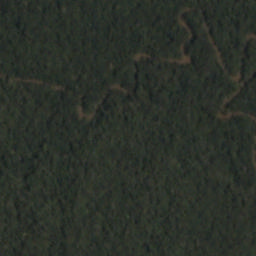

True label
clear primary water
Predicted
['road water primary clear']


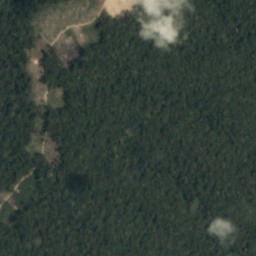

True label
cultivation habitation partly_cloudy primary road
Predicted
['cultivation habitation road agriculture water primary partly_cloudy']


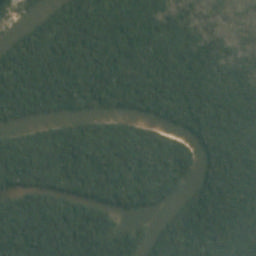

True label
clear primary water
Predicted
['agriculture water primary clear']


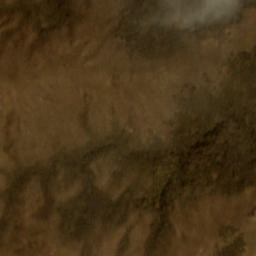

True label
agriculture clear
Predicted
['bare_ground agriculture primary clear']


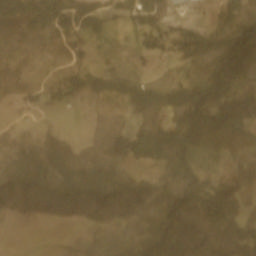

True label
agriculture bare_ground haze primary road
Predicted
['habitation road agriculture primary clear haze']


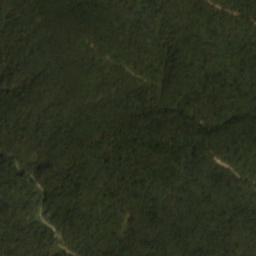

True label
clear primary road selective_logging
Predicted
['selective_logging road water primary clear']


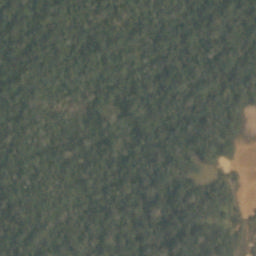

True label
clear cultivation primary
Predicted
['cultivation agriculture water primary clear']


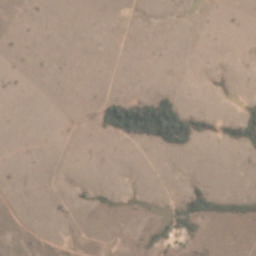

True label
agriculture clear habitation primary road
Predicted
['road agriculture primary clear']


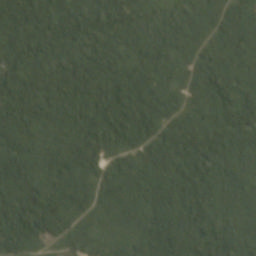

True label
clear habitation primary road water
Predicted
['road water primary clear']


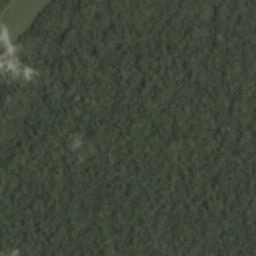

True label
agriculture partly_cloudy primary
Predicted
['primary partly_cloudy']


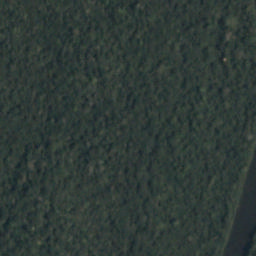

True label
clear primary
Predicted
['water primary clear']


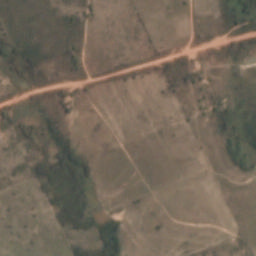

True label
agriculture clear primary road
Predicted
['habitation road agriculture water primary clear']


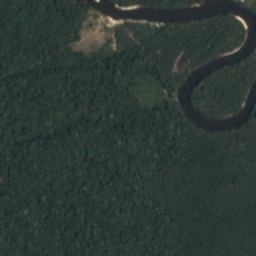

True label
clear cultivation primary water
Predicted
['cultivation habitation agriculture water primary clear']


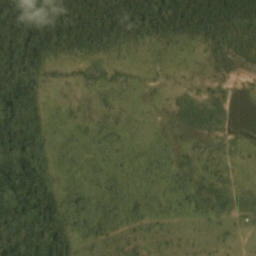

True label
agriculture clear primary road
Predicted
['road agriculture primary partly_cloudy clear']


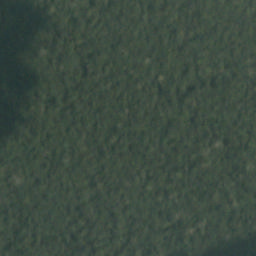

True label
clear primary water
Predicted
['primary clear']


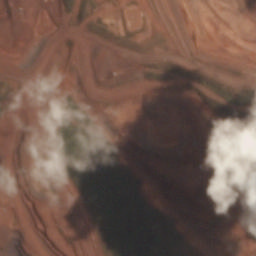

True label
conventional_mine partly_cloudy primary road
Predicted
['conventional_mine habitation road primary partly_cloudy']


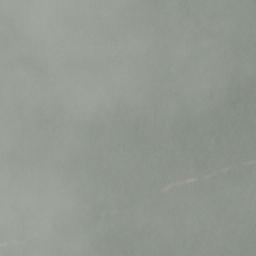

True label
haze primary road
Predicted
['road water primary cloudy haze']


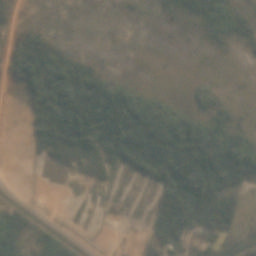

True label
agriculture clear habitation primary road
Predicted
['road agriculture primary clear']


In [48]:
#Some incorrectly predicted examples
i = 0
while(i<100):
    idx = np.random.randint(40479)
    f,tags = df_train.values[idx,:]
    img = cv2.imread('train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
    x_train = np.array(cv2.resize(img, (200, 200)),np.float32)/255.#139 minimum size for inception
    x_train -= train_mean
    targets = np.array(targets,bool)
    y = model.predict(x_train[np.newaxis,:])
    y_pred = np.array(y > thresh_2_val,bool)
    if(not (y_pred==targets).all()):
        ipython_img = Image(filename='train-jpg/{}.jpg'.format(f))
        display(ipython_img)
        labels_np = np.array(labels)
        preds = [' '.join(labels_np[np.array(y_pred[i,:],bool)]) for i in range(y_pred.shape[0])]
        print('True label')
        print(tags)
        print('Predicted')
        print(preds)
        i+=1

In [8]:
model.layers[-1].name

'dense_2'

True label
agriculture clear primary road water
Predicted
['cultivation habitation road agriculture water primary partly_cloudy clear']


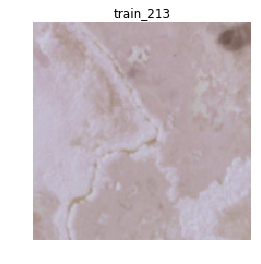

Working on filters: [9]


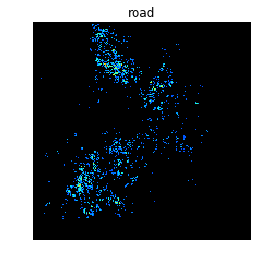

Working on filters: [10]


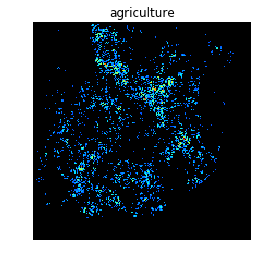

Working on filters: [11]


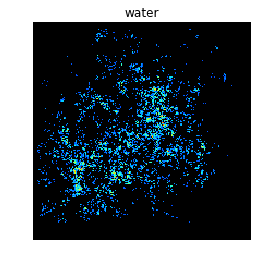

Working on filters: [12]


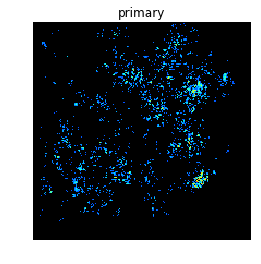

Working on filters: [15]


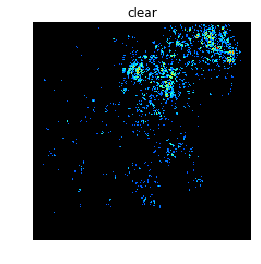

True label
partly_cloudy primary selective_logging
Predicted
['selective_logging road primary partly_cloudy clear']


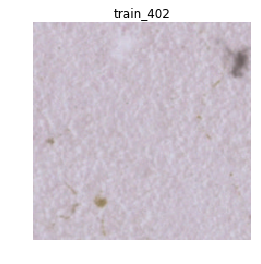

Working on filters: [5]


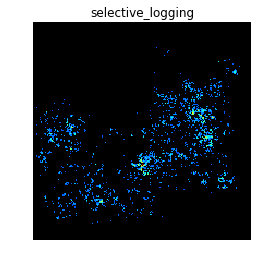

Working on filters: [12]


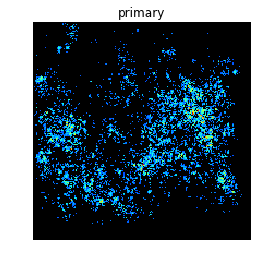

Working on filters: [13]


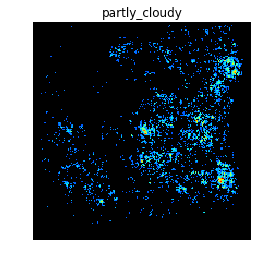

True label
clear primary
Predicted
['primary clear']


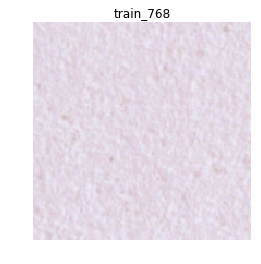

Working on filters: [12]


/home/cs231n/myVE35/lib/python3.5/site-packages/vis/visualization.py:169: RuntimeWarning: invalid value encountered in true_divide
  grads /= np.max(grads)
/home/cs231n/myVE35/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/home/cs231n/myVE35/lib/python3.5/site-packages/vis/visualization.py:171: RuntimeWarning: invalid value encountered in less
  heatmap[np.where(grads < 0.2)] = 0


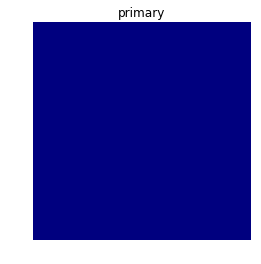

Working on filters: [15]


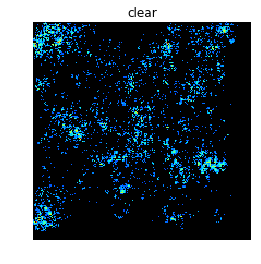

True label
agriculture clear habitation primary road
Predicted
['habitation road agriculture primary clear']


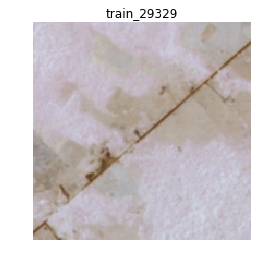

Working on filters: [8]


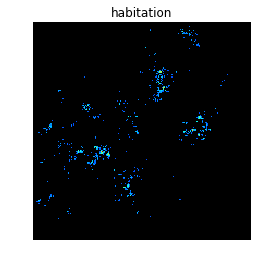

Working on filters: [9]


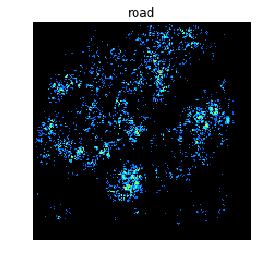

Working on filters: [10]


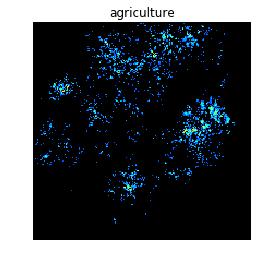

Working on filters: [12]


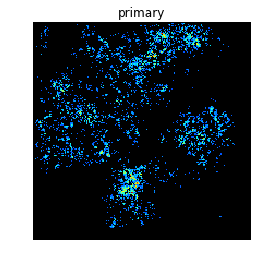

Working on filters: [15]


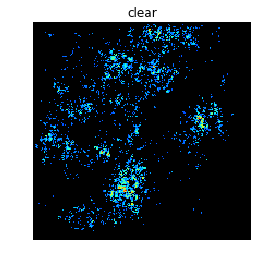

True label
artisinal_mine clear primary water
Predicted
['artisinal_mine water primary clear']


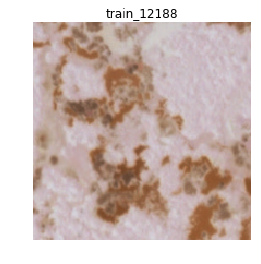

Working on filters: [4]


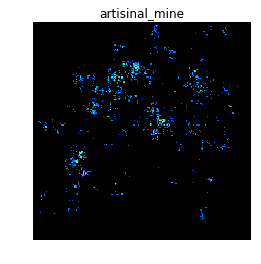

Working on filters: [11]


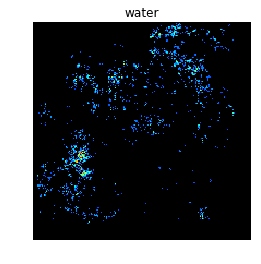

Working on filters: [12]


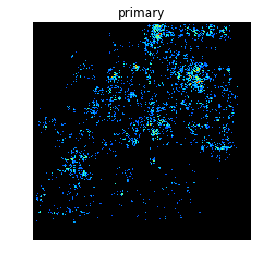

Working on filters: [15]


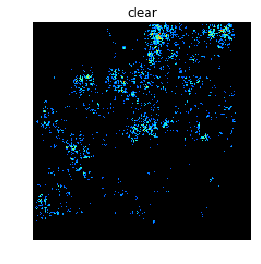

In [5]:
%matplotlib inline
# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'dense_2'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]
for idx in [213,402,768,29329,12188]:
    f,tags = df_train.values[idx,:]
    img = cv2.imread('train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 

    x = np.array(cv2.resize(img, (200, 200)),np.float32)
    x_1 = x/255.
    x_train = x_1 - train_mean
    targets = np.array(targets,bool)
    y = model.predict(x_train[np.newaxis,:])
    y_pred = np.array(y > thresh_2_val,bool)
    labels_np = np.array(labels)
    preds = [' '.join(labels_np[np.array(y_pred[i,:],bool)]) for i in range(y_pred.shape[0])]
    print('True label')
    print(tags)
    print('Predicted')
    print(preds)
    
    plt.axis('off')
    plt.imshow(x)
    plt.title(f)
    plt.show()
    for j in np.nonzero(targets)[0]:
        pred_class = j
        heatmap = visualize_saliency(model, layer_idx, [pred_class], x_train, alpha=0)
        plt.axis('off')
        plt.imshow(heatmap)
        plt.title(labels[j])
        plt.show()